<a href="https://colab.research.google.com/github/PJunior17/pytorch_tutorial/blob/main/Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

We will be doing an end to end on one particular workflow for pytorch

## The work flow is as follows
 1. Prepare and Load data
 2. Build the model
 3. Fit the model to the data
 4. Making predictions and evaluating the model
 5. Saving and loading the model
 6. Putting it all together

# Code

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## Preparing and Loading Data

In [23]:
# create known parameters
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
#this will make a tensor from 0 to 1 where each element is 0.02 away from each other
#this should make 50 elements
X = torch.arange(start, end, step).unsqueeze(dim=1)
#linear regression
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets

In [24]:
# Create the train test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [25]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  #plots the training data
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')

  #plots the test data
  plt.scatter(test_data, test_labels, c='r', s=4, label='Testing Data')

  #are there predicitons to plot?
  if predictions is not None:
    plt.scatter(test_data, predictions, c='g', s=4, label='Predictions')

  #show the legend
  plt.legend(prop={'size':14})


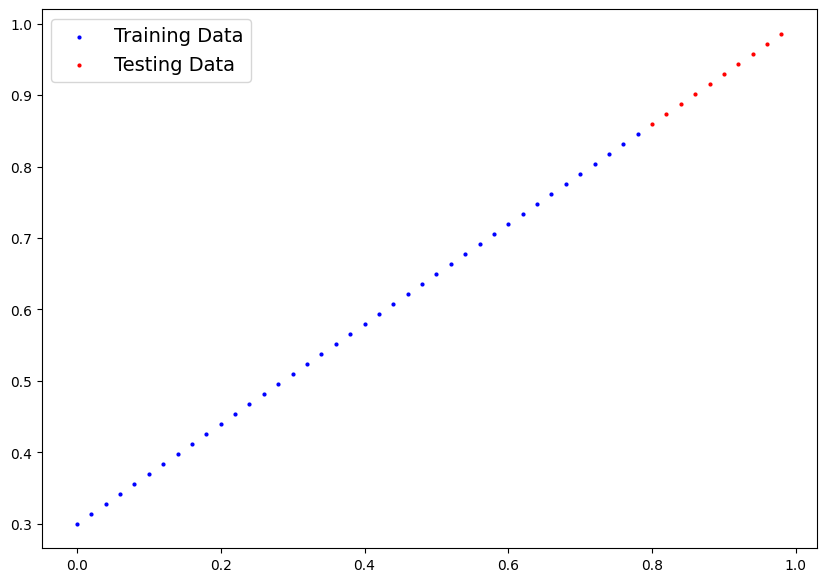

In [26]:
plot_predictions()

## Build the model

In [32]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [33]:
torch.manual_seed(17)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([-1.4135], requires_grad=True),
 Parameter containing:
 tensor([0.2336], requires_grad=True)]

In [34]:
#the goal is to get the model to our ideal values, our weight and bias that we instantiated earlier
model_0.state_dict(), weight, bias

(OrderedDict([('weights', tensor([-1.4135])), ('bias', tensor([0.2336]))]),
 0.7,
 0.3)

In [37]:
# Make predictions with torch.inference_mode()
#using inference mode with the predictions tells pytorch to not keep track of the gradient data
#this can help your program not keep track of too much data and use power for other tasks
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[-0.8972],
        [-0.9254],
        [-0.9537],
        [-0.9820],
        [-1.0103],
        [-1.0385],
        [-1.0668],
        [-1.0951],
        [-1.1233],
        [-1.1516]])

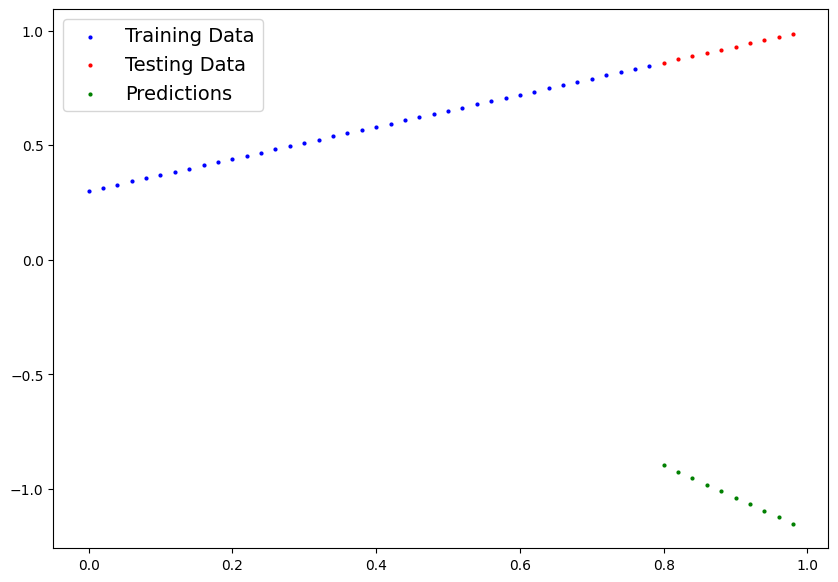

In [36]:
plot_predictions(predictions=y_preds)

## Train the Model

In [38]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 1e-3)


### Build a training and testing loop

In [ ]:
epochs = 1
#training loop

#loop through data
for epoch in range(epochs):
  model_0.train() #sets all parameters that require a gradient to require a gradient

  #forward propagation
  y_pred = model_0(X_train)

  #loss function
  loss = loss_fn(y_pred, y_train)

  #optimizer zero grad
  optimizer.zero_grad()

  #back propagation
  loss.backward()

  #gradient descent
  optimizer.step()

